START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
# mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'Cupper'
soil_type = 'Crop Soil'
soil = 'Alteck'
soil_short = 'Crop'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 20  # Mixing layer depth in mm
soil_height2 = 20  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.967591161606
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  3.80968602754
55 mm/h - 30min  -4.16283710639
30 mm/h - 30min  -21.305808952
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  13.440000000000001 cm/h
ksat med12:  13.440000000000001 cm/h
ksat med30:  13.440000000000001 cm/h
ksat low:  13.440000000000001 cm/h
--------------------------------------------
R2:  0.942064837787
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -35.8910849727
55 mm/h - 30min  -8.50907325802
30 mm/h - 30min  -30.5302507367
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

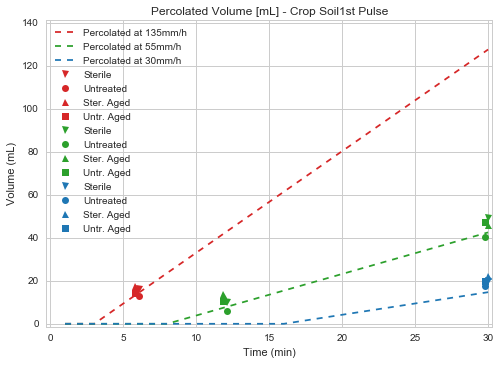

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
Sterile
--------------------------------------------
Koc tested:  [  5.60868490e+01   1.40883795e+02   1.77362190e+02   3.53884093e+02
   7.06091594e+02   2.23285767e+03   2.23285767e+04   2.23285767e+07]
Best log Kd (Fresh):  0.5 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  -1.47731335659 
 Effective Koc (fresh) - [cm3/g]: 70.4418974465
--------------------------------------------
Best log Kd (Aged):  0.10000000000000002 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  0.740570211813 
 Effective Koc (aged) [cm3/g]: 56.0868489617
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  266.287395987 | 31.5007160549 | 8.6
(A) 135 mm/h - Aged  229.842763627 | 46.1779869078 | 14.0
(B) 55 mm/h - Fresh  145.054385029 | 22.5450034227 | 9.2
(B) 55 mm/h - Aged  138.538265171 | 33.3953571239 | 14.0
(C) 55 mm/

#### Test factor X (Living)

In [15]:
x = 2

In [16]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
Living
--------------------------------------------
Koc tested:  [  3.93931226e+01   9.89510501e+01   1.24571992e+02   2.48553800e+02
   4.95930031e+02   1.56826846e+03   1.56826846e+04   1.56826846e+07]
Best log Kd (Fresh):  1.2 cm3/g ( Num:  5 ) 
 x factor:  2 
 R2:  0.0224309601713 
 Effective Koc (fresh) - [cm3/g]: 247.965015405
--------------------------------------------
Best log Kd (Aged):  0.10000000000000002 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  1.0 
 Effective Koc (aged) [cm3/g]: 39.393122592
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  207.362443779 | 2.15153710646 | 0.7
(A) 135 mm/h - Aged  No obs | < LD  | 43.0818306201 | nan
(B) 55 mm/h - Fresh  269.103938059 | 1.47641575223 | 0.4
(B) 55 mm/h - Aged  No obs | < LD  | 31.029024936 | nan
(C) 55 mm/h - Fresh  -4

#### Time series

In [17]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [18]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse, Crop Soil)

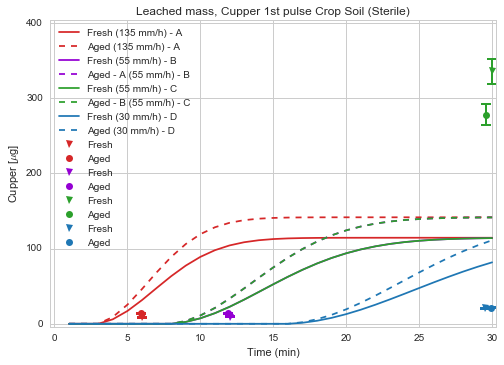

In [19]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

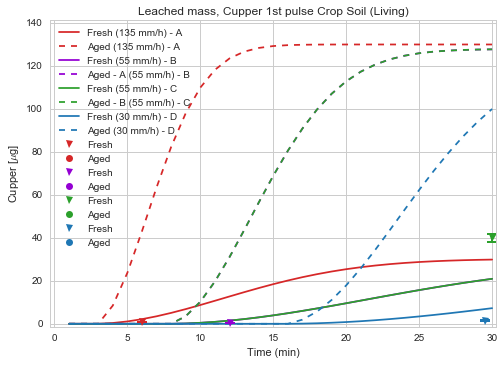

In [20]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest = leachsim3(
    soil,
    kSat = [
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

R2:  0.986519395284
--------------------------------------------
Sterile, Fresh Soil
ksat high:  0.5376000000000001 cm/h | Error % 2.23130461905
ksat med12:  0.5376000000000001 cm/h | Error % 3.03794067885
ksat med30:  0.07680000000000001 cm/h | Error % -1.32673504375
ksat low:  0.5376000000000001 cm/h | Error % -3.79771247202
--------------------------------------------
Sterile, Aged Soil
ksat high:  0.038400000000000004 cm/h | Error % -3.96936053404
ksat med12:  0.01344 cm/h | Error % 96.4892134055
ksat med30:  0.01344 cm/h | Error % 0.668887214674
ksat low:  0.01344 cm/h | Error % 772.613137848
--------------------------------------------
Living, Fresh Soil
ksat high:  0.17920000000000003 cm/h | Error % 1.83525165621
ksat med12:  0.5376000000000001 cm/h | Error % 1.25918043976
ksat med30:  0.01344 cm/h | Error % 43.2893178308
ksat low:  0.05376 cm/h | Error % -1.06637611809
--------------------------------------------
Living, Fresh Aged
ksat high:  0.07680000000000001 cm/h | Error %

### Percolation - 2nd pulse

In [22]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

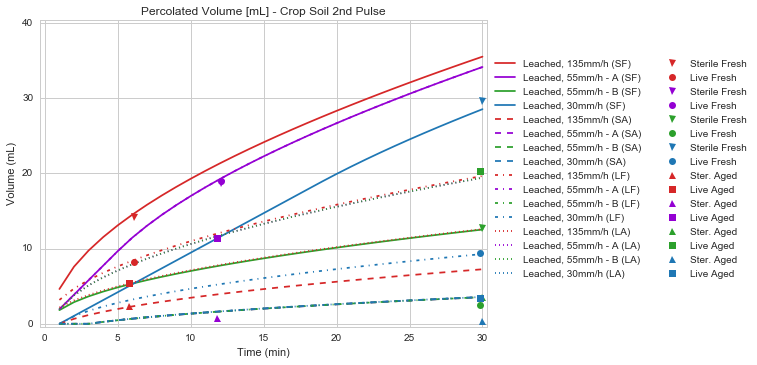

In [23]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [24]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

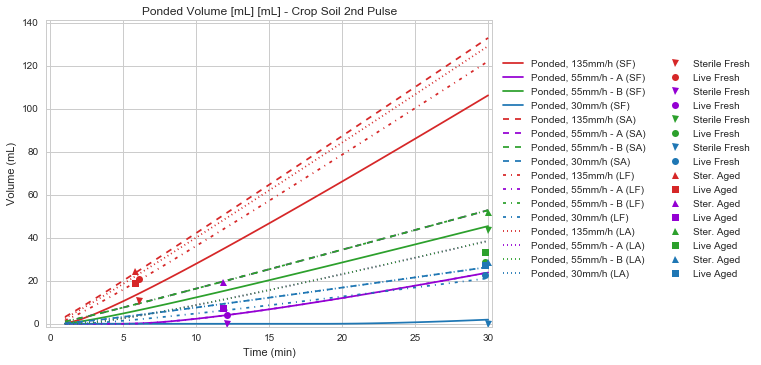

In [25]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [26]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [27]:
x = 2

In [28]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile
--------------------------------------------
Koc tested:  [  5.60868490e+01   1.40883795e+02   1.77362190e+02   3.53884093e+02
   7.06091594e+02   2.23285767e+03   2.23285767e+04   2.23285767e+07]
Best log Kd (Fresh):  1.2 cm3/g ( Num:  5 ) 
 x factor:  2 
 R2:  0.156481798906 
 Effective Koc (fresh) - [cm3/g]: 353.045797127
--------------------------------------------
Best log Kd (Aged):  1.2 cm3/g ( Num:  5 ) 
 x factor: No factor considered.  
 R2:  0.983728135164 
 Effective Koc (aged) [cm3/g]: 706.091594253
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -37.6666070838 | 3.02316955643 | 4.85
(A) 135 mm/h - Aged  -86.147487633 | 0.102508591516 | 0.74
(B) 55 mm/h - Fresh  -1.85328646355 | 6.30101900904 | 6.42
(B) 55 mm/h - Aged  No obs | < LD  | 0.116087077985 | nan
(C) 55 mm/h - Fresh 

#### Kd optimal (living)

In [29]:
x = 2

In [30]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living
--------------------------------------------
Koc tested:  [  3.93931226e+01   9.89510501e+01   1.24571992e+02   2.48553800e+02
   4.95930031e+02   1.56826846e+03   1.56826846e+04   1.56826846e+07]
Best log Kd (Fresh):  1.7 cm3/g ( Num:  6 ) 
 x factor:  2 
 R2:  0.804617582 
 Effective Koc (fresh) - [cm3/g]: 784.134228718
--------------------------------------------
Best log Kd (Aged):  0.10000000000000002 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  1.0 
 Effective Koc (aged) [cm3/g]: 39.393122592
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -51.9098406737 | 0.283731940025 | 0.59
(A) 135 mm/h - Aged  No obs | < LD  | 34.4280763759 | nan
(B) 55 mm/h - Fresh  -5.04009412644 | 1.03506297402 | 1.09
(B) 55 mm/h - Aged  No obs | < LD  | 87.2755796706 | nan
(C) 55 mm/h - Fresh  

#### Time series

In [31]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

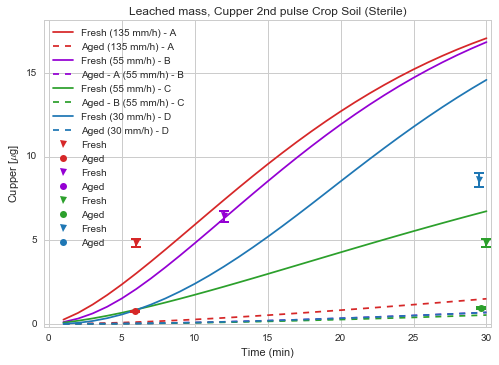

In [32]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

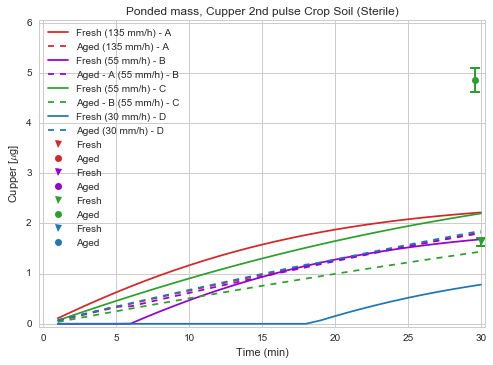

In [33]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

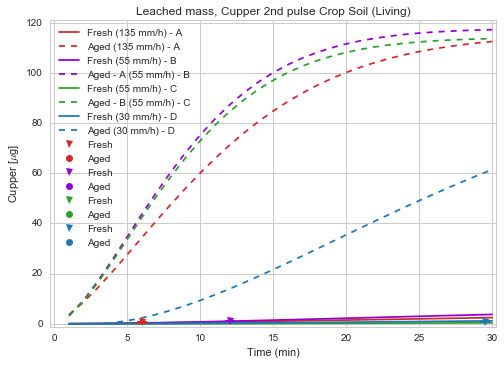

In [34]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

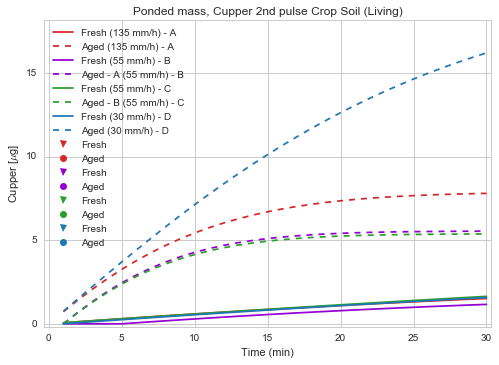

In [35]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

In [36]:
import pprint

In [37]:
pprint.pprint(output_hydro_params)

{'Crop': [{'Err1': [{'Aged': [-9.9497695760673803,
                              -35.891084972674633,
                              -8.5090732580166115,
                              -30.530250736692416],
                     'Fresh': [-1.6576800420983793,
                               3.8096860275430022,
                               -4.1628371063889817,
                               -21.305808952008178]}],
           'Err2': [{'LA': [0.1041023527855152,
                            2.9320569323726215,
                            -4.2848362010996981,
                            5.4353835686236112],
                     'LF': [1.8352516562050032,
                            1.2591804397577877,
                            43.289317830834683,
                            -1.0663761180911517],
                     'SA': [-3.9693605340439162,
                            96.489213405488485,
                            0.66888721467447454,
                            772.61313784789968],
  

In [38]:
pprint.pprint(output_pesti_params)

{'Crop': {'Err1': {'LA': ['No obs | < LD ',
                          'No obs | < LD ',
                          'No obs | < LD ',
                          'No obs | < LD '],
                   'LF': [207.36244377944251,
                          269.10393805857427,
                          -47.687258882567804,
                          384.50762305569788],
                   'SA': [229.84276362718271,
                          138.5382651709921,
                          -49.129016712940185,
                          414.26422178891738],
                   'SF': [266.28739598682552,
                          145.05438502911443,
                          -66.048703444079706,
                          298.54275625878881]},
          'Err2': {'LA': ['No obs | < LD ',
                          'No obs | < LD ',
                          'No obs | < LD ',
                          'No obs | < LD '],
                   'LF': [-51.909840673710981,
                          -5.040094126440

END NOTEBOOK